<a href="https://colab.research.google.com/github/pavaniParjapnour/E-commerce/blob/main/sales_revenue_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler


from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [15]:
data = pd.read_csv('train.csv',error_bad_lines=False)
stores = pd.read_csv('/content/stores.csv')
features = pd.read_csv('/content/features.csv')

<ipython-input-15-47ced36f963f>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('train.csv',error_bad_lines=False)
Skipping line 69074: expected 5 fields, saw 6

<ipython-input-15-47ced36f963f>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv',error_bad_lines=False)


In [16]:
data.shape

(447000, 5)

In [17]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1.0,2010-02-05,24924.50,False
1,1,1.0,2010-02-12,46039.49,True
2,1,1.0,2010-02-19,41595.55,False
3,1,1.0,2010-02-26,19403.54,False
4,1,1.0,2010-03-05,21827.90,False


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447000 entries, 0 to 446999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         447000 non-null  int64  
 1   Dept          446999 non-null  float64
 2   Date          446999 non-null  object 
 3   Weekly_Sales  446999 non-null  float64
 4   IsHoliday     446999 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 17.1+ MB


In [19]:
data.isna().sum()

Store           0
Dept            1
Date            1
Weekly_Sales    1
IsHoliday       1
dtype: int64

In [20]:
stores.shape

(45, 3)

In [21]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [22]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [23]:
features.shape

(8190, 12)

In [24]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [25]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [26]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [27]:
# filling missing values
features['CPI'].fillna(features['CPI'].median(),inplace=True)
features['Unemployment'].fillna(features['Unemployment'].median(),inplace=True)

In [28]:
features['MarkDown1'].value_counts().unique()

array([2, 1])

In [29]:
from pandas.core.ops import flex_arith_method_FRAME
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x<0 else x )
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [30]:
data = pd.merge(data,stores,on='Store',how='left')

In [31]:
data = pd.merge(data,features,on=['Store','Date'],how='left')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1.0,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1.0,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1.0,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1.0,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1.0,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [32]:
data['Date'] = pd.to_datetime(data['Date'],errors='coerce')
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,,,,,,,,,,
2010-02-05,1,1.0,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,12,80.0,2010-02-05,39.90,False,B,112238,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,False
2010-02-05,31,59.0,2010-02-05,745.74,False,A,203750,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False
2010-02-05,31,67.0,2010-02-05,6939.56,False,A,203750,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False
2010-02-05,12,79.0,2010-02-05,52268.55,False,B,112238,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,False


In [33]:
#check whether the column IsHoliday_x and IsHoliday_y are same or not
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [34]:
#Since this two columns are same so drop any one column and make another column as IsHoliday
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 447000 entries, 2010-02-05 to NaT
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         447000 non-null  int64         
 1   Dept          446999 non-null  float64       
 2   Date          446999 non-null  datetime64[ns]
 3   Weekly_Sales  446999 non-null  float64       
 4   Type          447000 non-null  object        
 5   Size          447000 non-null  int64         
 6   Temperature   446999 non-null  float64       
 7   Fuel_Price    446999 non-null  float64       
 8   MarkDown1     446999 non-null  float64       
 9   MarkDown2     446999 non-null  float64       
 10  MarkDown3     446999 non-null  float64       
 11  MarkDown4     446999 non-null  float64       
 12  MarkDown5     446999 non-null  float64       
 13  CPI           446999 non-null  float64       
 14  Unemployment  446999 non-null  float64       
 15  IsHolida

In [35]:
data.head()


,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1.0,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,12,80.0,2010-02-05,39.90,B,112238,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,False
2010-02-05,31,59.0,2010-02-05,745.74,A,203750,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False
2010-02-05,31,67.0,2010-02-05,6939.56,A,203750,39.05,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False
2010-02-05,12,79.0,2010-02-05,52268.55,B,112238,49.47,2.962,0.0,0.0,0.0,0.0,0.0,126.442065,13.975,False


In [36]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

<ipython-input-36-5a11e9e33be7>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [37]:
#Outlier Detection and Abnormalities
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.head()

,Store,Dept,max,min,mean,median,std
0,1,1.0,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,1,2.0,65615.36,35819.83,46102.090420,45561.85,3440.673222
2,1,3.0,51159.17,6165.73,13150.478042,10366.85,8708.978853
3,1,4.0,47893.23,32497.43,36964.154476,36579.96,2930.698313
4,1,5.0,85676.09,11570.27,24257.941119,21183.42,11330.286495


In [38]:
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       33
dtype: int64

In [39]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.head(2)

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
0,1,1.0,2010-02-05,24924.5,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010.0,2.0,5.0,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,12,80.0,2010-02-05,39.9,B,112238,49.47,2.962,0.0,0.0,...,13.975,False,2010.0,2.0,5.0,323.78,-40.46,56.475461,39.28,58.789429


In [40]:
store_data.dropna(inplace=True)

In [41]:
data = store_data.copy()

In [42]:
data['Date'] = pd.to_datetime(data['Date'],errors='coerce')
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1.0,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010.0,2.0,5.0,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,11,22.0,2010-02-05,21763.61,A,207499,46.04,2.572,0.0,0.0,...,7.368,False,2010.0,2.0,5.0,29203.59,10468.69,15500.204266,14796.40,3203.050267
2010-02-05,10,48.0,2010-02-05,2941.00,B,126512,54.34,2.962,0.0,0.0,...,9.765,False,2010.0,2.0,5.0,6414.00,177.00,2175.001399,2017.00,1199.699586
2010-02-05,11,23.0,2010-02-05,39186.02,A,207499,46.04,2.572,0.0,0.0,...,7.368,False,2010.0,2.0,5.0,78141.44,23628.53,34322.483497,33481.13,7536.115476
2010-02-05,11,24.0,2010-02-05,11616.97,A,207499,46.04,2.572,0.0,0.0,...,7.368,False,2010.0,2.0,5.0,21796.57,4672.37,8592.320839,7363.89,3512.202829


In [43]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1.0,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,False,2010.0,2.0,5.0,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
2010-02-05,11,22.0,2010-02-05,21763.61,A,207499,46.04,2.572,214.424881,7.368,False,2010.0,2.0,5.0,29203.59,10468.69,15500.204266,14796.40,3203.050267,0.0
2010-02-05,10,48.0,2010-02-05,2941.00,B,126512,54.34,2.962,126.442065,9.765,False,2010.0,2.0,5.0,6414.00,177.00,2175.001399,2017.00,1199.699586,0.0
2010-02-05,11,23.0,2010-02-05,39186.02,A,207499,46.04,2.572,214.424881,7.368,False,2010.0,2.0,5.0,78141.44,23628.53,34322.483497,33481.13,7536.115476,0.0
2010-02-05,11,24.0,2010-02-05,11616.97,A,207499,46.04,2.572,214.424881,7.368,False,2010.0,2.0,5.0,21796.57,4672.37,8592.320839,7363.89,3512.202829,0.0


In [44]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [45]:
data_numeric.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown
Date,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0.0
2010-02-05,21763.61,207499,46.04,2.572,214.424881,7.368,0.0
2010-02-05,2941.00,126512,54.34,2.962,126.442065,9.765,0.0
2010-02-05,39186.02,207499,46.04,2.572,214.424881,7.368,0.0
2010-02-05,11616.97,207499,46.04,2.572,214.424881,7.368,0.0


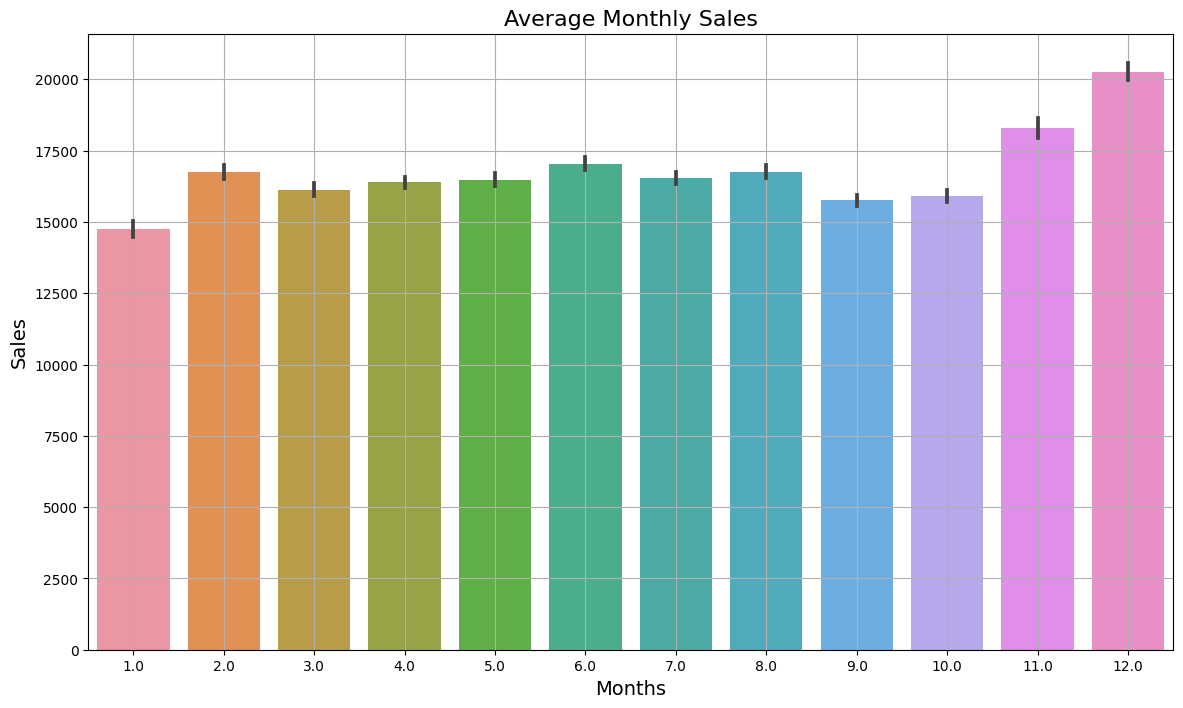

In [46]:
#Average Monthly Sales
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.savefig('avg_monthly_sales.png')
plt.grid()

<ipython-input-47-9bbd3da3997f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature'])


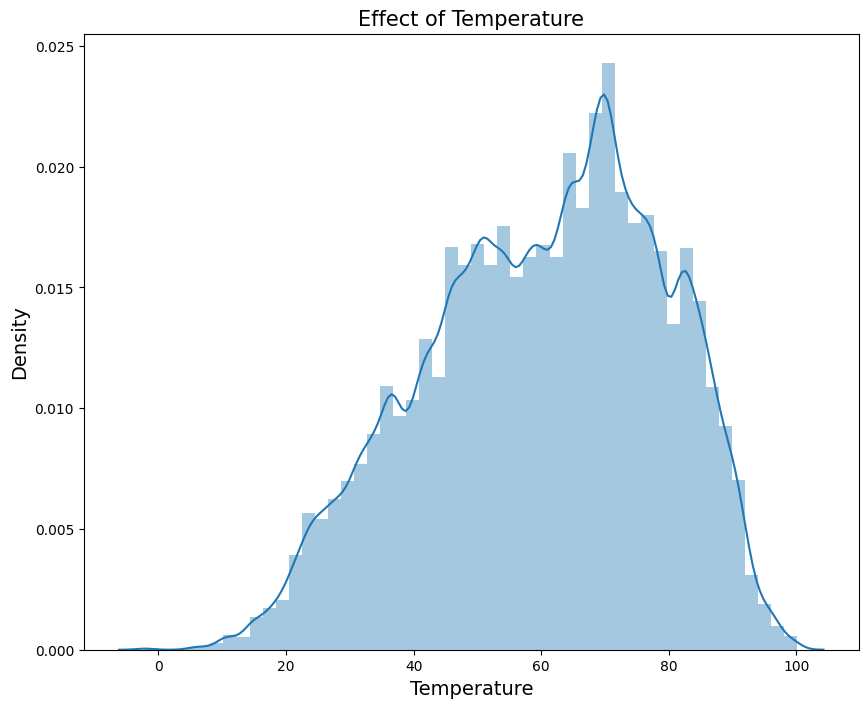

In [47]:
# Effect of Temperature on Sales
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.savefig('effect_of_temp.png')
plt.show()

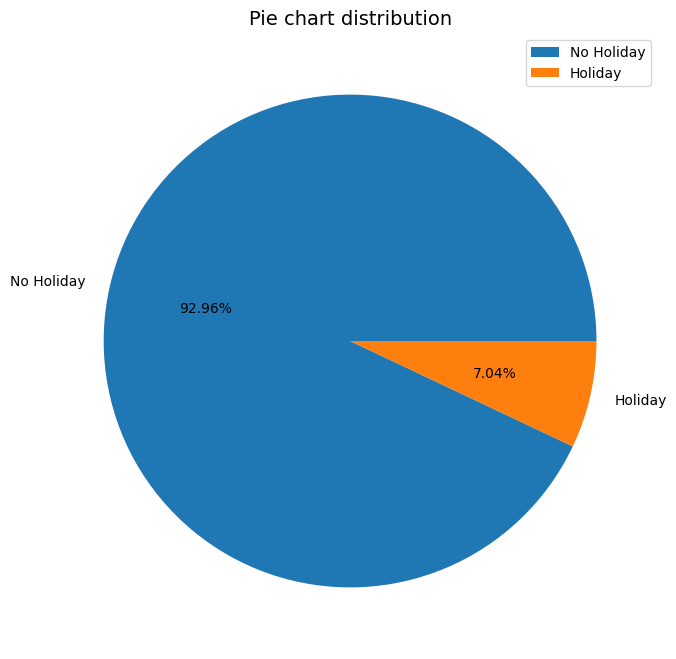

In [48]:
# Holiday Distribution
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.savefig('holiday_distribution.png')
plt.show()

In [49]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()
data_cat.head()

,Store,Dept,Type
Date,,,
2010-02-05,1,1.0,A
2010-02-05,11,22.0,A
2010-02-05,10,48.0,B
2010-02-05,11,23.0,A
2010-02-05,11,24.0,A


In [69]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93.0,Dept_94.0,Dept_95.0,Dept_96.0,Dept_97.0,Dept_98.0,Dept_99.0,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
data = pd.concat([data, data_cat],axis=1)

In [71]:
data.drop(columns=cat_col,inplace=True)

In [72]:
data.drop(columns=['Date'],inplace=True)


In [51]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [73]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [74]:
data = normalization(data.copy(),num_col)
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93.0,Dept_94.0,Dept_95.0,Dept_96.0,Dept_97.0,Dept_98.0,Dept_99.0,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.042851,0.630267,0.434149,0.050100,0.840500,0.405118,False,2010.0,2.0,5.0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.038323,0.934381,0.470646,0.050100,0.873400,0.334388,False,2010.0,2.0,5.0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.011360,0.496013,0.551859,0.245491,0.003737,0.564117,False,2010.0,2.0,5.0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.063280,0.934381,0.470646,0.050100,0.873400,0.334388,False,2010.0,2.0,5.0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.023788,0.934381,0.470646,0.050100,0.873400,0.334388,False,2010.0,2.0,5.0,...,0,0,0,0,0,0,0,1,0,0


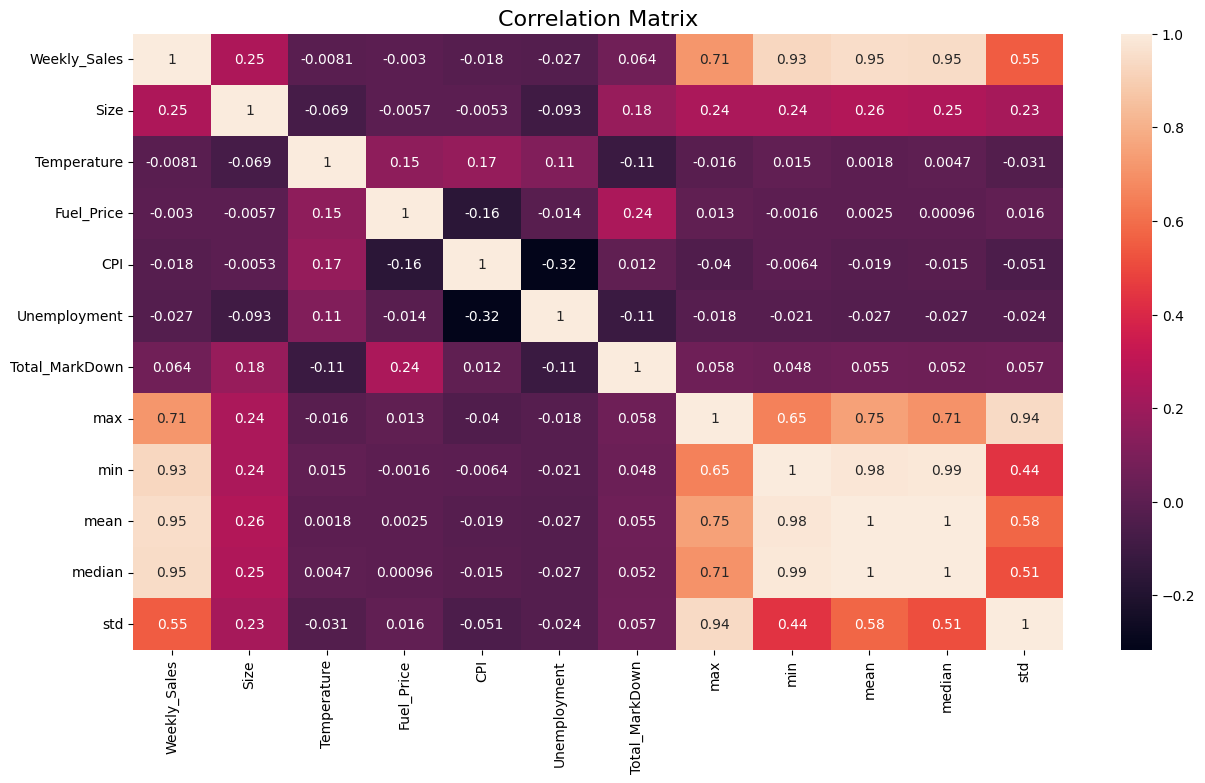

In [52]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.savefig('correlation_matrix.png')
plt.show()

In [79]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

In [81]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [82]:
linear_regression_accuracy = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",linear_regression_accuracy)

Linear Regressor Accuracy -  90.45344554635976


In [83]:
y_pred = lr.predict(X_test)

In [84]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.004178093422316614
MSE 0.00010739768459281445
RMSE 0.010363285415003027
R2 0.9045346781965218


In [85]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.head()

,Actual,Predicted
Date,,
2012-08-31,0.020955,0.021629
2011-04-22,0.010281,0.010958
2010-06-25,0.023299,0.015282
2011-07-15,0.071974,0.069536
2012-07-27,0.007246,0.005770
